In [4]:
# Import external script
%run models.py

# Import libraries
from sklearn.model_selection import train_test_split as tts

# Import data from CSV
fdata = pd.read_csv('data_histories.csv', index_col="dp_folio")

pm = ProbModel()

In [8]:
# Clusterize between obese and non obese
obesity = {0:[1,2,3], 1:[4,5,6]}
ndata = pm.clusterize_discrete("AIMC", obesity, "obesity", fdata)

# Clusterize excercise features
ejer = {"A":"greatereq_than(2.5)", "B":"less_than(2.5)"}
ndata = pm.clusterize_continuous("ejer_act", ejer, "ejer0B", ndata)
ndata = pm.clusterize_continuous("ejer1", ejer, "ejer1B", ndata)
ndata = pm.clusterize_continuous("ejer5", ejer, "ejer5B", ndata)
ndata = pm.clusterize_continuous("ejer10", ejer, "ejer10B", ndata)
ndata = pm.clusterize_continuous("ejer20", ejer, "ejer20B", ndata)
ndata = pm.clusterize_continuous("ejer30", ejer, "ejer30B", ndata)

# Clusterize weight features
condi = {"A":[4,5], "B":[1,2,3]}
ndata = pm.clusterize_discrete("condi_act", condi, "condi0B", ndata)
ndata = pm.clusterize_discrete("condi1", condi, "condi1B", ndata)
ndata = pm.clusterize_discrete("condi5", condi, "condi5B", ndata)
ndata = pm.clusterize_discrete("condi10", condi, "condi10B", ndata)
ndata = pm.clusterize_discrete("condi20", condi, "condi20B", ndata)
ndata = pm.clusterize_discrete("condi30", condi, "condi30B", ndata)

# ndata = pm.group_list_of_variables(["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejer20B"], "ejer0_20", ndata)
ndata = pm.group_list_of_variables(["condi0B", "condi1B", "condi5B", "condi10B", "condi20B"], "condi0_20", ndata)

In [10]:
# Select relevant data
selected_class = "obesity"
filtered_features = ["condi0B", "condi1B", "condi5B", "condi10B", "condi20B", "condi0_20"]
sdata = ndata[filtered_features].join(ndata[selected_class])
sdata = sdata[(sdata.condi20B != "N") & (sdata.condi10B != "N") & (sdata.condi5B != "N") & (sdata.condi1B != "N") & (sdata.condi0B != "N")]
sdata

,condi0B,condi1B,condi5B,condi10B,condi20B,condi0_20,obesity
dp_folio,,,,,,,
1,B,A,A,A,A,BAAAA,1
2,A,A,A,A,A,AAAAA,0
3,B,B,B,B,A,BBBBA,1
4,B,B,A,A,A,BBAAA,1
6,B,B,B,A,A,BBBAA,0
...,...,...,...,...,...,...,...
1076,B,B,B,A,A,BBBAA,1
1077,B,B,B,B,B,BBBBB,0
1078,A,A,A,A,A,AAAAA,0


In [12]:
# Split the data between training and test (2/3 for training and 1/3 for testing)
X = sdata[filtered_features]
Y = sdata[selected_class]
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.333)

print(X_train.shape)
print(X_test.shape)
data_train_raw = X_train.join(Y_train)
data_test_raw = X_test.join(Y_test)
data_train_raw.head()

(626, 9)
(313, 9)


,ejer0B,ejer1B,ejer5B,ejer10B,ejer20B,ejer0_1,ejer0_5,ejer0_10,ejer0_20,obesity
dp_folio,,,,,,,,,,
353,B,B,B,A,A,BB,BBB,BBBA,BBBAA,0
801,A,A,A,A,A,AA,AAA,AAAA,AAAAA,0
433,B,B,A,A,A,BB,BBA,BBAA,BBAAA,0
51,A,B,A,A,A,AB,ABA,ABAA,ABAAA,1
578,B,B,B,B,B,BB,BBB,BBBB,BBBBB,1


### Preselection of data

In [11]:
options_low_noise = ["AAAAA","BBBBB", "BBAAA", "BBBAA", "BAAAA", "BBBBA", "AAAAB"]
# options = np.array(pm.string_generator("", ["A", "B"], 5)).flatten()

data_train = data_train_raw[data_train_raw["ejer0_20"].isin(options_low_noise)]
data_test = data_test_raw[data_test_raw["ejer0_20"].isin(options_low_noise)]
data_test

,ejer0B,ejer1B,ejer5B,ejer10B,ejer20B,ejer0_1,ejer0_5,ejer0_10,ejer0_20,obesity
dp_folio,,,,,,,,,,
178,B,B,B,B,B,BB,BBB,BBBB,BBBBB,0
557,B,A,A,A,A,BA,BAA,BAAA,BAAAA,0
457,A,A,A,A,A,AA,AAA,AAAA,AAAAA,0
320,B,B,B,B,B,BB,BBB,BBBB,BBBBB,0
581,B,B,A,A,A,BB,BBA,BBAA,BBAAA,0
...,...,...,...,...,...,...,...,...,...,...
462,B,B,B,B,B,BB,BBB,BBBB,BBBBB,1
613,B,A,A,A,A,BA,BAA,BAAA,BAAAA,0
36,A,A,A,A,B,AA,AAA,AAAA,AAAAB,1


### GNB and NBA

In [12]:
# Queries for NBA
queries_nba = {"condi0B": ["A", "B"],
               "condi1B": ["A", "B"],
               "condi5B": ["A", "B"],
               "condi10B": ["A", "B"],
               "condi20B": ["A", "B"]
              }

# Queries for GNB
buf = np.array(pm.string_generator("", ["A", "B"], 5)).flatten()
hist_posibilities = pm.string_padding("", buf, "")

queries_gnb = { "condi0_20": hist_posibilities }

In [14]:
# Define models and predict
gnb = NB()
gnb.train(queries_gnb, "obesity", 1, data_train_raw)
gnb.predict(data_test_raw)
Y_prob_gnb = gnb.predicted_scores

nba = NB()
nba.train(queries_nba, "obesity", 1, data_train_raw)
nba.predict(data_test_raw)
Y_prob_nba = nba.predicted_scores

In [15]:
gnb.predicted_scores

,ejer0_20,total_score
dp_folio,,
376,0.416822,0.416822
935,0.0856614,0.085661
519,0.0856614,0.085661
148,-0.838009,-0.838009
689,0.0856614,0.085661
...,...,...
234,-0.0983422,-0.098342
537,0.0856614,0.085661
70,0.198909,0.198909


### ROC Curve

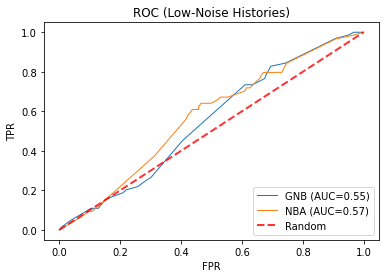

In [16]:
fpr1, tpr1, thresholds1 = roc_curve(data_test_raw["obesity"].values, Y_prob_gnb.values[:, -1])
fpr2, tpr2, thresholds2 = roc_curve(data_test_raw["obesity"].values, Y_prob_nba.values[:, -1])
roc_auc_gnb = auc(fpr1, tpr1)
roc_auc_nba = auc(fpr2, tpr2)
plt.plot(fpr1, tpr1, lw=1, alpha=1.0, label="GNB (AUC=%0.2f)" % (roc_auc_gnb))
plt.plot(fpr2, tpr2, lw=1, alpha=1.0, label="NBA (AUC=%0.2f)" % (roc_auc_nba))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC (Low-Noise Histories)")
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random', alpha=.8)
plt.legend(loc="lower right")
plt.show()

### Precision Recall Curve

In [16]:
from sklearn.metrics import precision_recall_curve

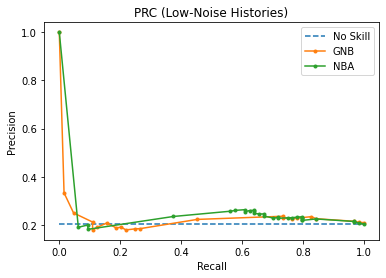

In [18]:
precision_gnb, recall_gnb, thresholds = precision_recall_curve(data_test_raw["obesity"].values, Y_prob_gnb.values[:, -1])
precision_nba, recall_nba, thresholds = precision_recall_curve(data_test_raw["obesity"].values, Y_prob_nba.values[:, -1])

prc_auc_gnb = auc(recall_gnb, precision_gnb)
prc_auc_nba = auc(recall_nba, precision_nba)

# plot the precision-recall curves
no_skill = len(data_test_raw["obesity"].values[data_test_raw["obesity"].values == 1]) / len(data_test_raw["obesity"].values)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# plt.plot(recall_gnb, precision_gnb, marker='.', label="GNB (AUC=%0.2f)" % (prc_auc_gnb))
# plt.plot(recall_nba, precision_nba, marker='.', label="NBA (AUC=%0.2f)" % (prc_auc_nba))

plt.plot(recall_gnb, precision_gnb, marker='.', label="GNB")
plt.plot(recall_nba, precision_nba, marker='.', label="NBA")
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title("PRC (Low-Noise Histories)")

# show the legend
plt.legend()
# show the plot
plt.show()

In [68]:
mr = np.linspace(0, 1, 100)
ppvs = interp(mr, recall_gnb, precision_gnb)

In [74]:
np.flip(recall_gnb)

array([0.      , 0.015625, 0.046875, 0.109375, 0.109375, 0.125   ,
       0.15625 , 0.1875  , 0.203125, 0.21875 , 0.25    , 0.265625,
       0.453125, 0.734375, 0.734375, 0.765625, 0.78125 , 0.828125,
       0.84375 , 0.96875 , 0.984375, 1.      ])

### Cross-Validation Models

In [13]:
class ValidationPRC:
    
    def __init__(self, model):
        self.model = model
        self.model_type = type(model).__name__
        
    # Run a CV of the GNB model and perform a decile analysis of its results
    def run_cv(self, X, qF, cF, cC, folds, plot_name):

        kf = KFold(n_splits = folds, shuffle=True)

        # Variables for ROC
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)

        # Variables for PRC
        precisions = []
        mean_recall = np.linspace(0, 1, 100)

        # Variables for decile analysis
        sum_actual_tps = np.repeat(0.0, 10)
        sum_expected_tps = np.repeat(0.0, 10)

        j = 0
        for train_index, test_index in kf.split(X):
            train = pd.DataFrame()
            test = pd.DataFrame()
            for index in train_index:
                name = X.iloc[index].name
                train = train.append(X.loc[name])
            for index in test_index:
                name = X.iloc[index].name
                test = test.append(X.loc[name])

            self.model.train(qF, cF, cC, train)
            self.model.predict(test)
            Yprob = self.model.get_predicted_scores()

            # ROC
            fpr, tpr, thresholds_roc = roc_curve(test[cF].values, Yprob.values[:, -1])

            tprs.append(interp(mean_fpr, fpr, tpr))
            tprs[-1][0] = 0.0
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
            plt.figure(1)
            plt.plot(fpr, tpr, lw=1, alpha=0.8, label="ROC fold %d (AUC=%0.2f)" % (j + 1, roc_auc))

            # PRC
            precision, recall, thresholds_prc = precision_recall_curve(test[cF].values, Yprob.values[:, -1])
            precisions.append(interp(mean_recall, np.flip(recall), precision))
            prc_auc = auc(recall, precision)
            plt.figure(2)
            plt.plot(recall, precision, lw=1, alpha=0.8, label="PRC fold %d (AUC=%0.2f)" % (j + 1, prc_auc))

            j = j + 1

            # Decile analysis
            scores = Yprob.copy()
            scores[cF] = test[cF]
            bins = self.split_scores(scores, 10)
            actual_tps = self.get_decile_frequencies(bins, cF)      
            expected_tps = self.get_expected_tps(scores, cF, 10)

            sum_actual_tps += actual_tps
            sum_expected_tps += expected_tps

        # Means for ROC
        mean_tpr = np.mean(tprs, axis=0)
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)

        # Means for PRC
        mean_precision = np.mean(precisions, axis=0)

        # ROCs plot
        plt.figure(1)
        # plt.plot(mean_fpr, mean_tpr, lw=2, color='b', alpha=0.8, label='Mean ROC (AUC=%0.2f)' % (mean_auc))
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title(plot_name + ' ROC')
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
               label='Random', alpha=0.8)
        plt.legend(loc="lower right")

        # PRC plot
        plt.figure(2)
        no_skill = len(X[cF].values[X[cF].values == 1]) / len(X[cF].values)
        # plt.plot(mean_recall, mean_precision, lw=2, color='b', alpha=0.8, label='Mean ROC')
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(plot_name + ' PRC')
        plt.plot([0, 1], [no_skill, no_skill], linestyle='--', lw=2, color='r', label='Random', alpha=0.8)
        plt.legend(loc="upper right")

        plt.show()


        # Plot the results of the decile analysis
        mean_actual_tps = sum_actual_tps / (folds * 1.0)
        mean_expected_tps = sum_expected_tps / (folds * 1.0)
        self.plot_decile_bars(mean_actual_tps, mean_expected_tps, 10)
        
    # Function to plot the score distribution of the classified data, by deciles
    def plot_score_distribution(self, scores, classFeature, num_bins):
        # Sort by score and split the data into buckets (deciles)
        bins = self.split_scores(scores, num_bins)

        # Get the number of true positives by decile
        frequencies = self.get_decile_frequencies(bins, classFeature)

        # Get the expected value of true positives by decile, if the classification was made randomly
        expected = self.get_expected_tps(scores, classFeature, num_bins)

        # Plot the results
        self.plot_decile_bars(frequencies, expected, num_bins)

    # Split the scores dataframe in bins
    def split_scores(self, scores, num_bins):
        results = scores.copy()
        sorted_results = results.sort_values(by=["total_score"], ascending=False)
        bins = np.array_split(sorted_results, num_bins)
        return bins

    # Get the count of true positives for every bin
    def get_decile_frequencies(self, bins, classFeature):
        frequencies = []
        for binid in range(len(bins)):
            frequencies.append(bins[binid][classFeature].sum())
        return frequencies

    # Get the expected count of true positives per decile
    def get_expected_tps(self, scores, classFeature, num_bins):
        expected = np.repeat(scores[classFeature].sum(), num_bins) * 1.0 / num_bins
        return expected

    # Plot the results
    def plot_decile_bars(self, frequencies, expected, num_bins):
        plt.figure(3)
        plt.bar(np.arange(1, num_bins + 1, 1), frequencies, color='b', label="Actual True Positives")
        plt.plot(np.arange(1, num_bins + 1, 1), expected, color='r', linestyle='dashed', label="Random True Positives")
        plt.legend(loc="upper right")
        plt.xlabel("Score Decile")
        plt.ylabel("# of True Positives")
        plt.title("True Positives Distribution")
        plt.show()

### All Data

<ipython-input-13-fa786b37ca59>:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-13-fa786b37ca59>:52: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  precisions.append(interp(mean_recall, np.flip(recall), precision))
<ipython-input-13-fa786b37ca59>:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-13-fa786b37ca59>:52: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  precisions.append(interp(mean_recall, np.flip(recall), precision))
<ipython-input-13-fa786b37ca59>:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-1

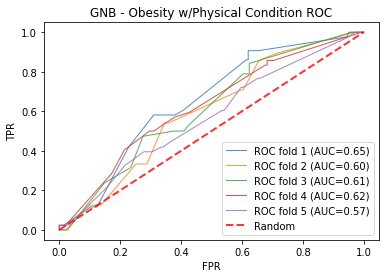

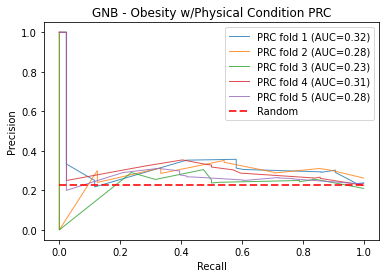

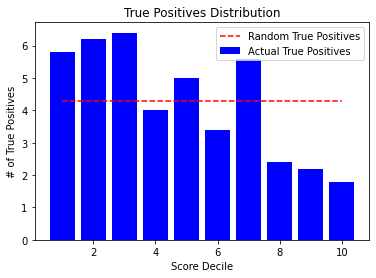

In [19]:
validation_gnb = ValidationPRC(NB())
validation_gnb.run_cv(sdata, queries_gnb, "obesity", 1, 5, "GNB - Obesity w/Physical Condition")

<ipython-input-13-fa786b37ca59>:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-13-fa786b37ca59>:52: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  precisions.append(interp(mean_recall, np.flip(recall), precision))
<ipython-input-13-fa786b37ca59>:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-13-fa786b37ca59>:52: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  precisions.append(interp(mean_recall, np.flip(recall), precision))
<ipython-input-13-fa786b37ca59>:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-1

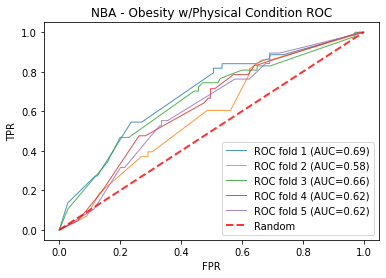

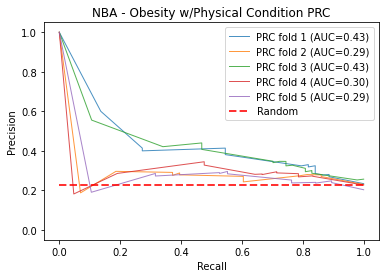

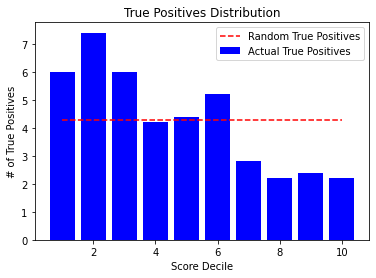

In [20]:
validation_nba = ValidationPRC(NB())
validation_nba.run_cv(sdata, queries_nba, "obesity", 1, 5, "NBA - Obesity w/Physical Condition")

### Low-Noise Data

<AxesSubplot:>

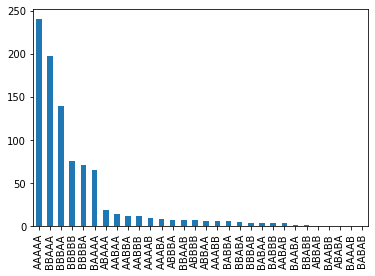

In [31]:
sdata["condi0_20"].value_counts().plot(kind='bar')

In [41]:
options_low_noise = ["AAAAA","BBAAA", "BBBAA", "BBBBB", "BBBBA", "BAAAA"]
# options = np.array(pm.string_generator("", ["A", "B"], 5)).flatten()

lndata = sdata[sdata["condi0_20"].isin(options_low_noise)]

In [42]:
lndata.shape

(789, 7)

<ipython-input-13-fa786b37ca59>:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-13-fa786b37ca59>:52: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  precisions.append(interp(mean_recall, np.flip(recall), precision))
<ipython-input-13-fa786b37ca59>:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-13-fa786b37ca59>:52: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  precisions.append(interp(mean_recall, np.flip(recall), precision))
<ipython-input-13-fa786b37ca59>:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-1

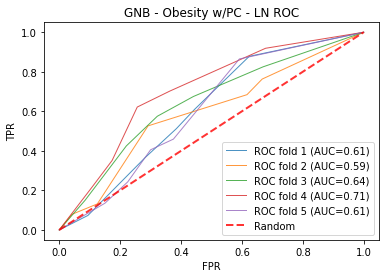

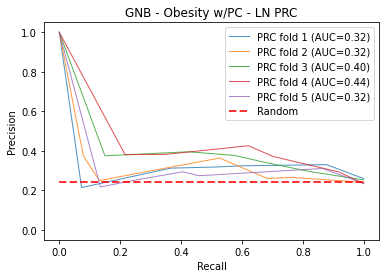

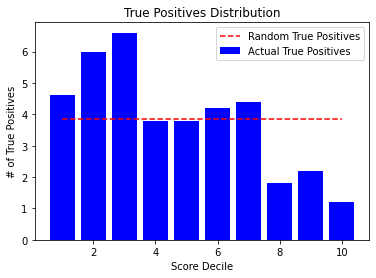

In [43]:
validation_gnb_ln = ValidationPRC(NB())
validation_gnb_ln.run_cv(lndata, queries_gnb, "obesity", 1, 5, "GNB - Obesity w/PC - LN")

<ipython-input-13-fa786b37ca59>:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-13-fa786b37ca59>:52: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  precisions.append(interp(mean_recall, np.flip(recall), precision))
<ipython-input-13-fa786b37ca59>:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-13-fa786b37ca59>:52: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  precisions.append(interp(mean_recall, np.flip(recall), precision))
<ipython-input-13-fa786b37ca59>:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-1

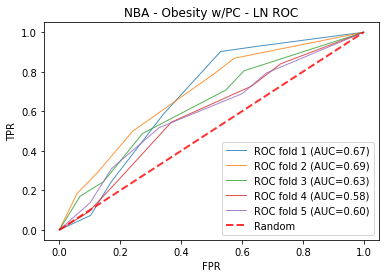

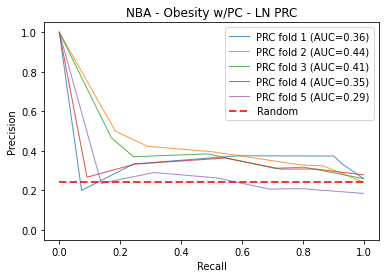

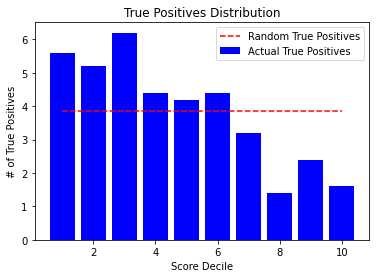

In [44]:
validation_nba_ln = ValidationPRC(NB())
validation_nba_ln.run_cv(lndata, queries_nba, "obesity", 1, 5, "NBA - Obesity w/PC - LN")